In [17]:
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import csv
from statistics import mean, variance
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
sns.set()
sns.set_style("whitegrid")
%config InlineBackend.figure_format = 'retina'

## 2009 data

In [14]:
df=pd.read_csv("full.csv", delimiter=";")
df

,Y,K,L,P,Region
0,304343.0,73127,793,1197.8,Белгородская область
1,126199.3,26858,638,415.7,Брянская область
2,188466.3,51546,755,3204.0,Владимирская область
3,302510.1,94788,1141,4674.6,Воронежская область
4,86572.8,31956,551,4070.1,Ивановская область
...,...,...,...,...,...
79,151750.4,65625,457,215.5,Амурская область
80,48128.4,15178,104,1039.0,Магаданская область
81,392311.7,118446,295,59697.2,Сахалинская область
82,25345.1,8039,90,61.3,Еврейская автономная область


In [18]:
df.describe(include='all')

,Y,K,L,P,Region,x,y
count,8.400000e+01,8.400000e+01,84.000000,84.000000,84,84.000000,84.000000
unique,NaN,NaN,NaN,NaN,83,NaN,NaN
top,NaN,NaN,NaN,NaN,n,NaN,NaN
freq,NaN,NaN,NaN,NaN,2,NaN,NaN
mean,4.742803e+05,1.241348e+05,1044.154762,6034.619048,NaN,-4.521190,1.281583
std,9.629110e+05,2.023041e+05,1148.490623,12626.125588,NaN,0.723528,0.316738
min,1.985850e+04,5.188000e+03,24.000000,0.000000,NaN,-7.323000,0.434000
25%,1.152451e+05,3.196500e+04,443.750000,554.750000,NaN,-4.781750,1.077250
50%,2.128174e+05,6.040600e+04,674.500000,1262.900000,NaN,-4.369500,1.290500
75%,4.242369e+05,1.130032e+05,1324.250000,4870.975000,NaN,-4.052500,1.475000


Now, we take natural log of the quantities L/K and P/K for each region. We will add new columns x and y to the dataframe.

In [15]:
df['x']=round(np.log(df['L']/df['K']),3)
df['y']=round(np.log(df['Y']/df['K']),3)
df

,Y,K,L,P,Region,x,y
0,304343.0,73127,793,1197.8,Белгородская область,-4.524,1.426
1,126199.3,26858,638,415.7,Брянская область,-3.740,1.547
2,188466.3,51546,755,3204.0,Владимирская область,-4.224,1.296
3,302510.1,94788,1141,4674.6,Воронежская область,-4.420,1.160
4,86572.8,31956,551,4070.1,Ивановская область,-4.060,0.997
...,...,...,...,...,...,...,...
79,151750.4,65625,457,215.5,Амурская область,-4.967,0.838
80,48128.4,15178,104,1039.0,Магаданская область,-4.983,1.154
81,392311.7,118446,295,59697.2,Сахалинская область,-5.995,1.198
82,25345.1,8039,90,61.3,Еврейская автономная область,-4.492,1.148


In [4]:

linreg = LinearRegression()
X = df[["x"]]
linreg.fit(X, df["y"])

LinearRegression()

In [5]:
pred = linreg.predict(X)
df["predictions"] = pred
df

,Y,K,L,P,Region,x,y,predictions
0,304343.0,73127,793,1197.8,Белгородская область,-4.524,1.426,1.280986
1,126199.3,26858,638,415.7,Брянская область,-3.740,1.547,1.447604
2,188466.3,51546,755,3204.0,Владимирская область,-4.224,1.296,1.344743
3,302510.1,94788,1141,4674.6,Воронежская область,-4.420,1.160,1.303089
4,86572.8,31956,551,4070.1,Ивановская область,-4.060,0.997,1.379597
...,...,...,...,...,...,...,...,...
79,151750.4,65625,457,215.5,Сахалинская область,-4.967,0.838,1.186839
80,48128.4,15178,104,1039.0,Еврейская автономная область,-4.983,1.154,1.183439
81,392311.7,118446,295,59697.2,Чукотский автономный округ,-5.995,1.198,0.968366
82,25345.1,8039,90,61.3,n,-4.492,1.148,1.287787


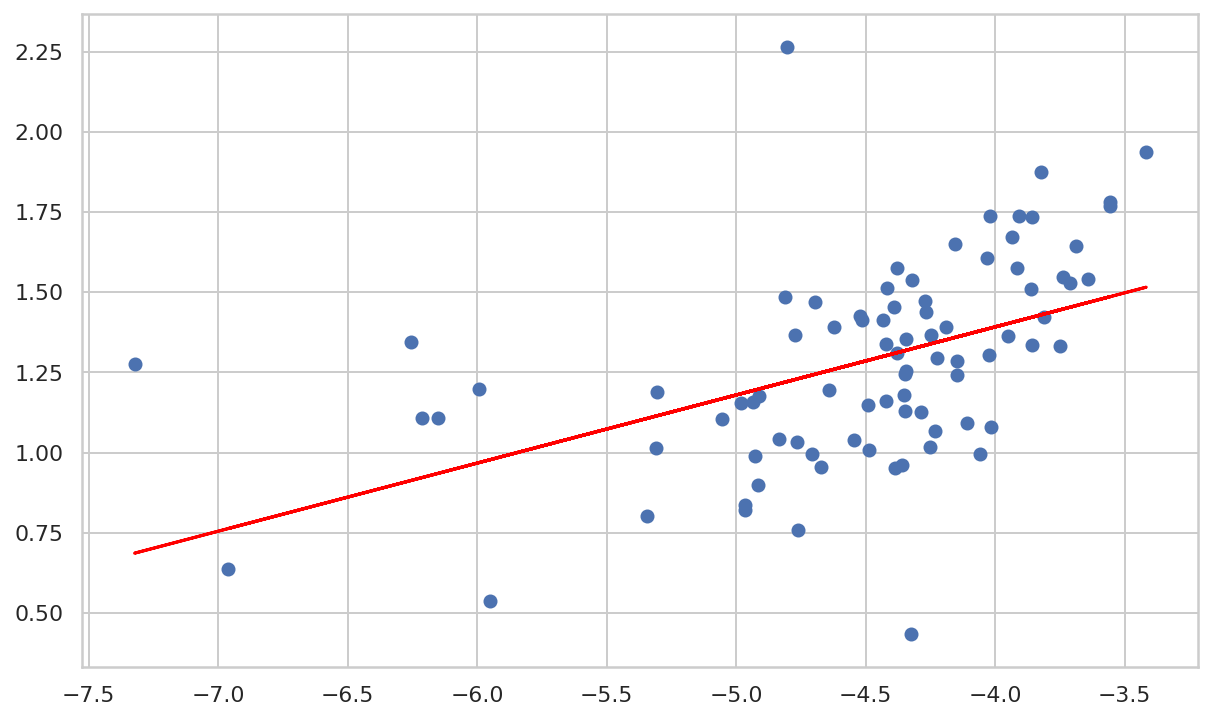

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(df['x'],df['y'])
plt.plot(df['x'],df['predictions'], color='red')
plt.show()

For the Cobb-Douglas model, we need to know the coefficient and the intercept of the linear model. We can get these info by typing the following code. Note that we will be limiting floats to five decimal points for simplicity. We could do this by writing {:0.5f} when we use format with print.

In [7]:
coefficient = 1 - linreg.coef_.astype(float)[0]
intercept = linreg.intercept_
print("Coefficient is {:0.5f} and intercept is {:0.5f}".format(coefficient, intercept))

Coefficient is 0.78748 and intercept is 2.24244


Next, we will see how to get the model from this information. Linear regression fitting our data is

$$
y = 2.24 + 0.787x
$$

$y = P/K$ and $x = L/K$. So, the linear regression formula becomes

$$
ln(P/K) = 2.24 + 0.787ln(L/K)
$$

Taking exponential of both sides

$$
P/K = e^{2.24}(L/K)^{0.787}
$$

Now, multiply both sides by $K$ and simlify the result to obtain

$$
P = (9.39)L^{0.787}K^{0.212}
$$


### Let's go nuts

In [8]:
def plotCD(fig, data, reg1, reg2, log):
    interval = (max(data["K"]) - min(data["K"])) // 20
    interval2 = (max(data["L"]) - min(data["L"])) // 20
    x = np.arange(min(data["K"]), max(data["K"]), interval)
    y = np.arange(min(data["L"]), max(data["L"]), interval2)
    x, y = np.meshgrid(x, y)
    fig.suptitle("Производственная функция Кобба-Дугласа")
    z1 = (math.exp(reg1[0]) if not log else reg1[0]) * x ** reg1[1] * y ** (1 - reg1[1])
    z2 = (math.exp(reg2[0]) if not log else reg2[0]) * x ** reg2[1] * y ** reg2[2]
    z = [z1, z2]
    for i in range(2):
        ax = fig.add_subplot(1, 2, i + 1, projection="3d")
        ax.plot_wireframe(
            x,
            y,
            z[i],
            antialiased=False,
            rstride=2,
            cstride=2,
            color="green" if i == 0 else "blue",
            linewidth=1,
        )
        ax.set_title(
            "Постоянная отдача от масштаба"
            if i == 0
            else "Доходность с переменным масштабом",
            fontweight="bold",
        )
        ax.set_xlabel("K", fontweight="bold")
        ax.set_ylabel("L", fontweight="bold")
        ax.set_zlabel("Y", fontweight="bold")
        ax.scatter(
            data["K"], data["L"], data["Y"], c="red", linewidth=0, antialiased=False
        )
    plt.show()

In [9]:
def getData(file, log, d=";"):
    data = {"Y": [], "K": [], "L": [], "P": []}

    with open(file, "r", newline="") as csvfile:
        freader = csv.reader(csvfile, delimiter=d)
        next(freader)
        for row in freader:
            if not log:
                row = [np.log(np.float(n.replace(",", "."))) for n in row]
            else:
                row = [float(n.replace(",", ".")) for n in row]
            data["Y"].append(row[0])
            data["K"].append(row[1])
            data["L"].append(row[2])
            if len(row) > 3:
                data["P"].append(row[3])
    return data

In [10]:
class RegressionModel:
    y = 0
    x1 = []
    x2 = None
    x3 = None
    residuals = []
    file = ""
    log = False
    model = []
    cond = 0

    def __init__(self, y, x1, x2=None, x3=None):
        self.y = y
        self.x1 = x1
        self.x2 = x2
        self.x3 = x3

    def cov(self, a, b):
        cov = 0.0
        for i in range(len(a)):
            cov += (a[i] - mean(a)) * (b[i] - mean(b))
        return cov / (len(a) - 1)

    def se(self, y, x1, residuals, x2=None, x3=None):
        se = []
        SSr = sum([(res) ** 2 for res in residuals])
        MSE = SSr / (len(y) - 3)
        if x2 is None:
            s = (sum([res ** 2 for res in residuals]) / (len(y) - 2)) ** 0.5
            SSX = sum([(x - mean(x1)) ** 2 for x in x1])
            xsq = [x ** 2 for x in x1]
            se.append(s * (sum(xsq) / (len(y) * SSX)) ** 0.5)
            se.append(s / (SSX) ** 0.5)
            return se
        elif x3 is None:
            mat = np.column_stack((np.array(np.ones(len(y))), np.array(x1), np.array(x2)))
        else:
            mat = np.column_stack(
                (np.array(np.ones(len(y))), np.array(x1), np.array(x2), np.array(x3))
            )
        mat = np.linalg.pinv(np.matmul(mat.transpose(), mat))
        se = [(d * MSE) ** 0.5 for d in mat.diagonal()]
        return se

    def getRes(self, y, x1, b0, b1, x2=None, b2=None, x3=None, b3=None):
        res = []
        yp = []
        if x2 is None:
            for i in range(len(y)):
                yp.append(b0 + b1 * x1[i])
                res.append(y[i] - yp[i])
        elif x3 is None:
            for i in range(len(y)):
                yp.append(b0 + b1 * x1[i] + b2 * x2[i])
                res.append(y[i] - yp[i])
        else:
            for i in range(len(y)):
                yp.append(b0 + b1 * x1[i] + b2 * x2[i] + b3 * x3[i])
                res.append(y[i] - yp[i])
        return res, yp

    def r2(self, y, residuals, ym):
        """
        Коэффициент детерминации
        """
        SSr = sum([res ** 2 for res in residuals])
        SSt = sum([(yi - ym) ** 2 for yi in y])
        return 1 - (SSr / SSt) if SSt != 0 else 1

    def r2_adj(self, y, R2, fac):
        """
        Коэффициент детерминации (скорректированный)
        """
        return 1 - (1 - R2) * ((len(y) - 1) / (len(y) - fac - 1))

    def f(self, y, yp, R2, fac):
        """
        Тест F
        """
        SSE = 0.0
        SSM = 0.0
        for i in range(len(y)):
            SSE += (y[i] - yp[i]) ** 2
            SSM += (yp[i] - mean(y)) ** 2
        return (SSM / (fac)) / (SSE / (len(y) - fac - 1)) if SSE != 0 else math.inf

    def t(self, coeff, se):
        """
        t-статистика
        """
        t_stat = []
        for i in range(len(coeff)):
            if se[i] == 0:
                continue
            t_stat.append(coeff[i] / se[i])
        return t_stat

    def dw(self, residuals):
        """
        Критерии Дарбина-Ватсона
        """
        sumr = 0.0
        rsq = sum([res ** 2 for res in residuals])
        for i in range(1, len(residuals)):
            sumr += (residuals[i] - residuals[i - 1]) ** 2
        return sumr / rsq if rsq != 0 else 0

    def jb(self, y, residuals):
        """
        Тест Жарка-Бера
        """
        m3 = sum([res ** 3 for res in residuals]) / len(y)
        sig3 = (sum([res ** 2 for res in residuals]) / len(y)) ** 1.5
        m4 = sum([res ** 4 for res in residuals]) / len(y)
        sig4 = (sum([res ** 2 for res in residuals]) / len(y)) ** 2
        S = m3 / sig3 if sig3 != 0 else 0
        C = m4 / sig4 if sig3 != 0 else 0
        jb_stat = len(y) * ((S ** 2) / 6 + ((C - 3) ** 2) / 24)
        return jb_stat

    def regr(self, y, x1, x2=None, x3=None):
        """
        Метод расчета коэффициентов регрессии.
        """
        if x2 is None:
            b1 = self.cov(x1, y) / variance(x1)
            b0 = mean(y) - b1 * mean(x1)
            coeff = [b0, b1]
            return coeff
        elif x3 is None:
            X = np.column_stack((np.array(np.ones(len(y))), np.array(x1), np.array(x2)))
        else:
            X = np.column_stack(
                (np.array(np.ones(len(y))), np.array(x1), np.array(x2), np.array(x3))
            )
        Y = np.column_stack(np.array(y))
        A = np.linalg.inv(np.matmul(X.transpose(), X))
        B = np.matmul(X.transpose(), Y.transpose())
        coeff = np.matmul(A, B)
        self.cond = np.linalg.cond(np.matmul(X.transpose(), X))
        coeff = np.squeeze(np.array(coeff))
        return coeff

    def CD(self):
        """
        Основной метод расчета регрессии и статистики.
        """
        y = self.y
        x1 = self.x1
        x2 = self.x2
        x3 = self.x3
        model = self.regr(y, x1, x2, x3)
        if len(model) == 3:
            res, yp = self.getRes(y, x1, model[0], model[1], x2, model[2])
        elif len(model) == 2:
            res, yp = self.getRes(y, x1, model[0], model[1])
        else:
            res, yp = self.getRes(y, x1, model[0], model[1], x2, model[2], x3, model[3])

        R2 = self.r2(y, res, mean(y))
        R2_adj = self.r2_adj(y, R2, len(model) - 1)
        dw_test = self.dw(res)
        F = self.f(y, yp, R2, len(model) - 1)
        SE = self.se(y, x1, res, x2, x3)
        t_stat = self.t(model, SE)
        jb_test = self.jb(y, res)
        self.model = model
        res = {
            "coefs": model,
            "standard error": SE,
            "t-statistic": t_stat,
            "Determination coefficient": R2,
            "Determination coefficient (close-fitting)": R2_adj,
            "Test F": F,
            "Durbin-Watson statistic": dw_test,
            "Jarque-Bera test": jb_test,
            "Condition number of X ^ tX": self.cond,
        }

        names_stat = [
            "coefs",
            "standard error",
            "t-statistic",
            "Determination coefficient",
            "Determination coefficient (close-fitting)",
            "Test F",
            "Durbin-Watson statistic",
            "Jarque-Bera test",
            "Condition number of X ^ tX",
        ]
        print(
            "{0}\n{1:^103}\n{2}".format("=" * 103, "Regression Summary", "=" * 103)
        )
        for i in range(len(names_stat)):
            print("{0:40} {1:}".format(names_stat[i], res[names_stat[i]]))
        print("\n")
        return res

... because fuck the reader, that's why.

In [11]:
def model(file: str, log: bool):
    try:
        data = getData(file, log)
        # fig = plt.figure()
        fig = plt.figure(figsize=(16,7))
        if len(data["P"]) != 0:
            reg3 = RegressionModel(
                [a - b for a, b in zip(data["Y"], data["P"])],
                [a - b for a, b in zip(data["K"], data["P"])],
                [a - b for a, b in zip(data["L"], data["P"])],
            )
            reg4 = RegressionModel(data["Y"], data["K"], data["L"], data["P"])
            reg3.CD()
            reg4.CD()
        else:
            reg1 = RegressionModel(
                [a - b for a, b in zip(data["Y"], data["L"])],
                [a - b for a, b in zip(data["K"], data["L"])],
            )
            reg2 = RegressionModel(data["Y"], data["K"], data["L"])
            reg1.CD()
            reg2.CD()
            plotCD(fig, getData(file, True), reg1.model, reg2.model, log)
    except Exception as err:
        print(err, "\n")

                                          Regression Summary                                           
coefs                                    [2.2421209339035006, 0.787542841427744]
standard error                           [0.19347343748785037, 0.0422614535344727]
t-statistic                              [11.588779126562528, 18.63501549432853]
Determination coefficient                0.8089752745807339
Determination coefficient (close-fitting) 0.8066457047585478
Test F                                   347.2638024738647
Durbin-Watson statistic                  1.6745157135021616
Jarque-Bera test                         14.375946334792417
Condition number of X ^ tX               0


                                          Regression Summary                                           
coefs                                    [2.07515239 0.79198646 0.23057584]
standard error                           [0.30038228236322057, 0.04282014445065765, 0.04914780034366039]
t-statistic          

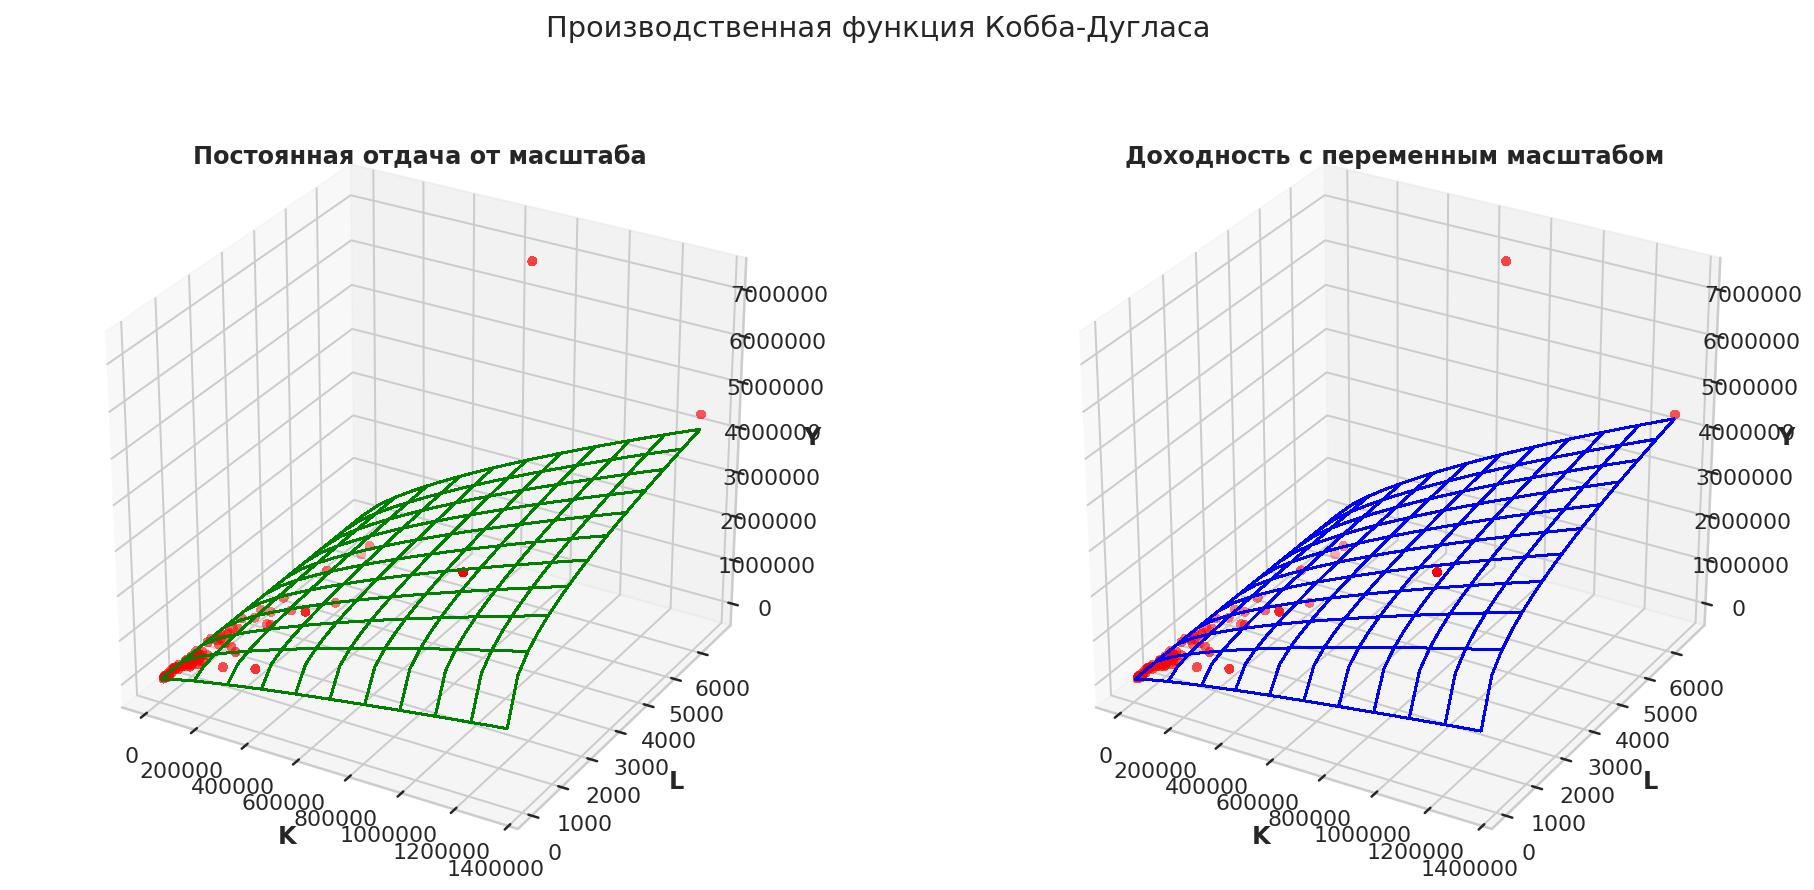

In [12]:
model("dataless.csv", log=False)

In [13]:
model("data.csv", log=True)

                                          Regression Summary                                           
coefs                                    [-2.67501853e+04  4.20039011e+00  2.14615056e-01]
standard error                           [65360.840392740436, 0.37192222887557463, 6.007855630970865]
t-statistic                              [-0.40926929875205426, 11.293732363606233, 0.035722405672347864]
Determination coefficient                0.7217076663040811
Determination coefficient (close-fitting) 0.7148362506572683
Test F                                   105.03041926139822
Durbin-Watson statistic                  1.9574752354023128
Jarque-Bera test                         10669.318249459136
Condition number of X ^ tX               70400632013.71272


                                          Regression Summary                                           
coefs                                    [-1.88431724e+05  2.70062789e+00  3.32478571e+02 -3.26267662e+00]
standard error          

<Figure size 1152x504 with 0 Axes>

Чем ближе распределение ошибок к нормальному, тем меньше статистика Харке—Бера отличается от нуля. При достаточно большом значении статистики p-value будет мало, и тогда будет основание отвергнуть нулевую гипотезу (статистика попала в «хвост» распределения).